# 3 Preprocessing and Modeling <a id='3_Preprocessing_and_Modeling'></a>

## 3.1 Contents<a id='1.1_Contents'></a>
* [3 Preprocessing and Modeling](#1_Preprocessing)
  * [3.1 Contents](#3.1_Contents)
  * [3.2 Introduction](#3.2_Introduction)
  * [3.3 Imports](#3.3_Imports)
  * [3.4 Load the Shows Dataset](#3.4_Load_the_Shows_Dataset)
  * [3.5 Baseline Modeling](#3.5_Baseline_Modeling)
      * [3.5.1 Linear (and Lasso) Regression](#3.5.1_Linear_(and_Lasso)_Regression)
      * [3.5.2 Evaluation Metrics for Linear (and Lasso) Regression](#3.5.2_Evaluation_Metrics_for_Linear(and_Lasso)_Regression)
      * [3.5.3 Random Forest Regression](#3.5.3_Random_Forest_Regression)
      * [3.5.4 Evaluation Metrics for Random Forest Regression](#3.5.4_Evaluation_Metrics_for_Random_Forest_Regression)
      * [3.5.5 XGBoost Regression](#3.5.5_XGBoost_Regression)
      * [3.5.6 Evaluation Metrics for XGBoost Regression](#3.5.6_Evaluation_Metrics_for_XGBoost_Regression)
  * [3.6 General Comparison of the Models](#3.6_General_Comparison_of_the_Models) 
  * [3.7 Saving the Models](#3.7_Saving_the_Models)
  * [3.8 Preprocessing Conclusion](#3.8_Preprocessing_Conclusion)


## 3.2 Introduction <a id = '3.2_Introduction'><a>


In this stage, first we will look for our best baseline modeling as a reference and later develop our own model to find the best variables to create a successful TV Show for a streamer. 

## 3.3. Imports <a id = '3.3_Imports'><a>

In [55]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
from datetime import datetime as dt
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
! pip install xgboost
import xgboost as xgb


## 3.4 Load the Shows Dataset<a id='3.4_Load_the_Shows_Dataset'></a> 

In [56]:
shows = pd.read_csv('datasets/series_DF.csv')
shows_df = pd.DataFrame(shows)
shows_df.head()

,imdb_id,tmdb_id,Title,titleType,startYear,endYear,Streamer,Age,genre_1,genre_2,...,second_country,actor_1_pop,actor_2_pop,actor_1_name,actor_2_name,cast_pop,team_popularity,imdb_rating,imdb_no_votes,total_popularity
0,1856010,1425,House of Cards,tvSeries,2013,2018,Netflix,18,Drama,Drama,...,US,35.6,26.5,Robin Wright,Michael Kelly,31.0,7.6,8.6,525135,5.76
1,2309295,42295,Hemlock Grove,tvSeries,2013,2015,Netflix,18,Drama,Fantasy,...,US,18.5,58.3,Landon Liboiron,Bill Skarsgård,38.4,2.4,7.0,42205,4.58
2,2372162,1424,Orange Is the New Black,tvSeries,2013,2019,Netflix,18,Comedy,Crime,...,US,28.4,12.3,Taylor Schilling,Natasha Lyonne,20.4,3.7,8.0,316768,5.32
3,2189461,60699,Marco Polo,tvSeries,2014,2016,Netflix,18,Action,Adventure,...,US,18.3,24.4,Lorenzo Richelmy,Benedict Wong,21.4,2.2,8.0,77293,5.04
4,3520702,61986,Bloodline,tvSeries,2015,2017,Netflix,18,Drama,Thriller,...,US,34.3,32.8,Kyle Chandler,Linda Cardellini,33.6,2.1,7.9,57529,5.01


In [57]:
shows_df.dtypes

imdb_id               int64
tmdb_id               int64
Title                object
titleType            object
startYear             int64
endYear               int64
Streamer             object
Age                   int64
genre_1              object
genre_2              object
creator/actor?        int64
origin_language      object
director_1_name      object
director_2_name      object
originalTitle        object
writer_1_imdb#        int64
writer_2_imdb#        int64
writer_3_imdb#        int64
director_1_imdb#      int64
director_2_imdb#      int64
director_3_imdb#      int64
director_3_name      object
writer_1_name        object
writer_2_name        object
writer_3_name        object
ep_run_times          int64
writer_1_pop        float64
writer_2_pop        float64
writer_3_pop        float64
director_1_pop      float64
director_2_pop      float64
director_3_pop      float64
tmdb_popularity     float64
no_of_ep              int64
no_of_seasons         int64
first_country       

In [58]:
shows_df['actor_1_name'] = shows_df['actor_1_name'].astype('string')
shows_df['actor_2_name'] = shows_df['actor_2_name'].astype('string')
shows_df['writer_1_name'] = shows_df['writer_1_name'].astype('string')
shows_df['writer_2_name'] = shows_df['writer_2_name'].astype('string')
shows_df['writer_3_name'] = shows_df['writer_3_name'].astype('string')
shows_df['first_country'] = shows_df['first_country'].astype('string')
shows_df['second_country'] = shows_df['second_country'].astype('string')
shows_df['director_3_name'] = shows_df['director_3_name'].astype('string')
shows_df['originalTitle'] = shows_df['originalTitle'].astype('string')
shows_df['director_1_name'] = shows_df['director_1_name'].astype('string')
shows_df['director_2_name'] = shows_df['director_2_name'].astype('string')
shows_df['genre_1'] = shows_df['genre_1'].astype('string')
shows_df['genre_2'] = shows_df['genre_2'].astype('string')
shows_df['Streamer'] = shows_df['Streamer'].astype('string')
shows_df['Title'] = shows_df['Title'].astype('string')
shows_df['titleType'] = shows_df['titleType'].astype('string')


In [59]:
shows_df.head(0).T

""
imdb_id
tmdb_id
Title
titleType
startYear
endYear
Streamer
Age
genre_1
genre_2


## 3.5 Baseline Modeling<a id ='3.5_Baseline_Modeling'><a>


In [64]:
#Create dummy or indicator features for categorical variables
df = shows_df.copy()

df = pd.get_dummies(df,
                     columns = ['genre_1', 'genre_2', 'origin_language', 'Streamer', 'first_country', 'second_country'])
display(df)


,imdb_id,tmdb_id,Title,titleType,startYear,endYear,Age,creator/actor?,director_1_name,director_2_name,...,second_country_PT,second_country_SA,second_country_SE,second_country_TH,second_country_TN,second_country_TR,second_country_TW,second_country_US,second_country_VN,second_country_ZA
0,1856010,1425,House of Cards,tvSeries,2013,2018,18,0,James Foley,Robin Wright,...,0,0,0,0,0,0,0,1,0,0
1,2309295,42295,Hemlock Grove,tvSeries,2013,2015,18,0,Carl Tibbetts,Floria Sigismondi,...,0,0,0,0,0,0,0,1,0,0
2,2372162,1424,Orange Is the New Black,tvSeries,2013,2019,18,0,Andrew McCarthy,Phil Abraham,...,0,0,0,0,0,0,0,1,0,0
3,2189461,60699,Marco Polo,tvSeries,2014,2016,18,0,Daniel Minahan,David Petrarca,...,0,0,0,0,0,0,0,1,0,0
4,3520702,61986,Bloodline,tvSeries,2015,2017,18,0,Mikael Håfström,Todd A. Kessler,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1236,26315488,225148,Celebrity,tvSeries,2023,0,18,0,Kim Cheol-gyu,Kim Cheol-gyu,...,0,0,0,0,0,0,0,0,0,0
1237,19723614,137978,Feedback,tvSeries,2023,2023,18,0,Leszek Dawid,Leszek Dawid,...,0,0,0,0,0,0,0,0,0,0
1238,4196686,68296,The Kicks,tvSeries,2015,2016,0,0,Joe Nussbaum,Luke Matheny,...,0,0,0,0,0,0,0,1,0,0
1239,5200330,71655,Dino Dana,tvSeries,2017,2020,0,0,J.J. Johnson,Stefan Scaini,...,0,0,0,0,0,0,0,0,0,0


In [65]:
#let's make sure of the feature types.
df.dtypes

imdb_id               int64
tmdb_id               int64
Title                string
titleType            string
startYear             int64
                      ...  
second_country_TR     uint8
second_country_TW     uint8
second_country_US     uint8
second_country_VN     uint8
second_country_ZA     uint8
Length: 204, dtype: object

In [66]:
# dropping unnecessary categorical and numerical features
df.drop(columns = ['imdb_id', 'tmdb_id', 'Title', 'titleType', 'originalTitle', 'director_1_name', 'director_2_name'
                  , 'director_3_name', 'writer_1_name', 'writer_2_name', 'writer_3_name', 'actor_1_name', 
                   'actor_2_name', 'writer_1_imdb#', 'writer_2_imdb#', 'writer_3_imdb#', 'director_1_imdb#',
                  'director_2_imdb#', 'director_3_imdb#', 'imdb_no_votes', 'actor_1_pop', 'actor_2_pop',
                   'writer_1_pop', 'writer_2_pop', 'writer_3_pop', 'director_1_pop', 'director_2_pop',
                   'director_3_pop','imdb_rating', 'tmdb_popularity'], inplace = True)
df.head()

,startYear,endYear,Age,creator/actor?,ep_run_times,no_of_ep,no_of_seasons,cast_pop,team_popularity,total_popularity,...,second_country_PT,second_country_SA,second_country_SE,second_country_TH,second_country_TN,second_country_TR,second_country_TW,second_country_US,second_country_VN,second_country_ZA
0,2013,2018,18,0,73,73,6,31.0,7.6,5.76,...,0,0,0,0,0,0,0,1,0,0
1,2013,2015,18,0,60,33,3,38.4,2.4,4.58,...,0,0,0,0,0,0,0,1,0,0
2,2013,2019,18,0,60,91,7,20.4,3.7,5.32,...,0,0,0,0,0,0,0,1,0,0
3,2014,2016,18,0,60,20,2,21.4,2.2,5.04,...,0,0,0,0,0,0,0,1,0,0
4,2015,2017,18,0,60,33,3,33.6,2.1,5.01,...,0,0,0,0,0,0,0,1,0,0


In [67]:
df.columns

Index(['startYear', 'endYear', 'Age', 'creator/actor?', 'ep_run_times',
       'no_of_ep', 'no_of_seasons', 'cast_pop', 'team_popularity',
       'total_popularity',
       ...
       'second_country_PT', 'second_country_SA', 'second_country_SE',
       'second_country_TH', 'second_country_TN', 'second_country_TR',
       'second_country_TW', 'second_country_US', 'second_country_VN',
       'second_country_ZA'],
      dtype='object', length=174)

In [68]:
# Making a Scaler object
#scaler = StandardScaler()
# Fitting data to the scaler object
#scaled_df = scaler.fit_transform(df)
#scaled_df = pd.DataFrame(scaled_df, columns= df.columns)
#scaled_df.columns

In [69]:
#Split into testing and training datasets 
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns = 'total_popularity'),df.total_popularity, 
                                                 test_size=0.25, 
                                                    random_state=47)


## 3.5.1 Linear (and Lasso) Regression <a id = '3.5.1_Linear_(and_Lasso)_Regression' ><a>

In [70]:
# Trying Linear Regression
start_time = dt.now()
linear = LinearRegression()
linear_model = linear.fit(X_train,y_train)

# regression coefficients
print('Coefficients: ', linear.coef_)
 

# variance score
print('Variance score: {}'.format(linear_model.score(X_test, y_test)))



Coefficients:  [-2.00419486e-02 -5.96851794e-06  2.25739797e-02  1.30989427e-01
  5.21588475e-03 -8.46557164e-04  6.83919175e-02  9.15447417e-03
  4.42077092e-02  2.77866910e-01  1.38959477e-01  3.10137375e-01
  1.93531218e-01  6.31952953e-02  2.49318620e-01  1.77316041e-03
  2.16742814e-01 -2.43396134e-01  2.46469511e-14 -4.13631600e-01
 -6.16883846e-01 -4.06957092e-01  4.24204306e-01 -3.52083738e-01
  1.57223236e-01 -7.89100387e-01  9.84237963e-02 -1.28933220e-02
  2.27595720e-15 -6.14851109e-02  1.64905296e-01  3.73360163e-02
  1.71719855e-01 -1.79657550e-01  8.02802479e-02  1.95390000e-01
 -4.60747142e-02 -2.22668731e-01 -3.58449410e-01  4.21983213e-02
  4.54267942e-01  1.09463720e-01  2.29741705e-01  2.72510170e-01
 -2.39590988e-01 -1.28089666e-01 -1.04507504e-01  2.86280314e-01
  2.84852155e-02  1.11022302e-16 -8.25850068e-02  4.61692788e-03
 -3.25254387e-01  1.86014671e-01  8.80085179e-02 -2.71058822e-01
 -1.13001560e-01  9.28122396e-03  1.58781116e-01  9.49494103e-02
  6.246758

In [71]:
# checking mean squared error and r squared score of the train data
y_train_pred = linear.predict(X_train)

mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
print ("Mean Squared Error: {}".format(mse_train), "R Squared Score: {}".format(r2_train))

Mean Squared Error: 0.18444699834313347 R Squared Score: 0.5316855469598918


In [72]:
y_test_pred = linear.predict(X_test)

mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
print ("Mean Squared Error: {}".format(mse_test), "R Squared Score: {}".format(r2_test))

Mean Squared Error: 0.24282804480012726 R Squared Score: 0.30939098843696156


Train data performs much better, let's check visually if our data is overfit.

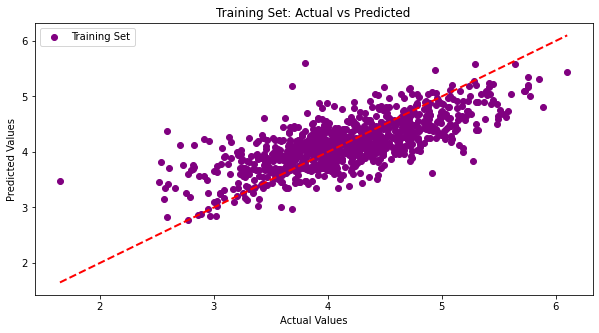

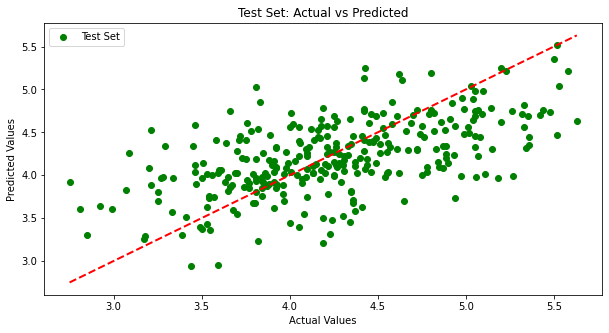

In [73]:
# Scatter plot for the training set
plt.figure(figsize=(10, 5))
plt.scatter(y_train, y_train_pred, color='purple', label='Training Set')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], linestyle='--', color='red', linewidth=2)
plt.title('Training Set: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

# Scatter plot for the test set
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_test_pred, color='green', label='Test Set')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.title('Test Set: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

yes it looks very overfit compared to test set. 

Let's try lasso model. But first, let's find the best alpha for it.

In [91]:
alphas = [0.1,0.3, 0.5, 0.8, 1]
lassocv = LassoCV(alphas=alphas, cv=5).fit(X_train,y_train)
print(lassocv.alpha_)

0.1


In [92]:
#Lasso regression model
lasso = Lasso(alpha = 0.1)
lasso_model = lasso.fit(X_train,y_train)
train_score_ls =lasso.score(X_train,y_train)
test_score_ls =lasso.score(X_test,y_test)

print("The train score {}".format(train_score_ls))
print("The test score  {}".format(test_score_ls))

The train score 0.38444219149186354
The test score  0.29744025312683464


This score looks better.

## 3.5.2 Evaluation Metrics for Linear (and Lasso) Regression<a id= '3.5.2_Evaluation_Metrics_for_Linear(and_Lasso)_Regression'><a>

Adjusted R-Squared for Linear Regressio:

In [76]:
#Make predictions
y_pred = linear.predict(X_test)

# Calculate the regular R-squared
linear_r2 = r2_score(y_test, y_pred)

# Get the number of observations (n) and predictors (k)
n = X_test.shape[0]
k = X_test.shape[1]

# Calculate the adjusted R-squared
linear_adjusted_r2 = 1 - ((1 - linear_r2) * (n - 1) / (n - k - 1))

print(f'R-squared: {linear_r2}')
print(f'Adjusted R-squared: {linear_adjusted_r2}')

R-squared: 0.30939098843696156
Adjusted R-squared: -0.5626919239747585


With Lasso

In [77]:
#Make predictions
y_pred2 = lasso.predict(X_test)

# Calculate the regular R-squared
lasso_r2 = r2_score(y_test, y_pred2)

# Get the number of observations (n) and predictors (k)
n = X_test.shape[0]
k = X_test.shape[1]

# Calculate the adjusted R-squared
lasso_adjusted_r2 = 1 - ((1 - lasso_r2) * (n - 1) / (n - k - 1))

print(f'R-squared: {lasso_r2}')
print(f'Adjusted R-squared: {lasso_adjusted_r2}')

R-squared: 0.29744025312683464
Adjusted R-squared: -0.5897337338005932


Mean Absolute Percentage Error:

In [78]:
# For Linear
percent_error = (y_test - y_pred) / y_test

ab_percent_error = abs(percent_error)

linear_mape = np.mean(ab_percent_error)
print ("Linear Reg's MAPE % {}".format(round(linear_mape *100,2)))

# Lasso
percent_error = (y_test - y_pred2) / y_test

ab_percent_error = abs(percent_error)

lasso_mape = np.mean(ab_percent_error)
print ("Lasso Reg's MAPE % {}".format(round(lasso_mape *100,2)))


Linear Reg's MAPE % 9.28
Lasso Reg's MAPE % 9.44


In [79]:
#there is also function doing the calcuations
line_mape = mean_absolute_percentage_error(y_test, y_pred)
print ("Linear Reg's MAPE % {}".format(round(linear_mape *100,2)))

lasso_mape = mean_absolute_percentage_error(y_test, y_pred2)
print ("Lasso Reg's MAPE % {}".format(round(lasso_mape *100,2)))


Linear Reg's MAPE % 9.28
Lasso Reg's MAPE % 9.44


There doesn't seem to be so much improvement.

Actual-vs-Predicted scatter plots:

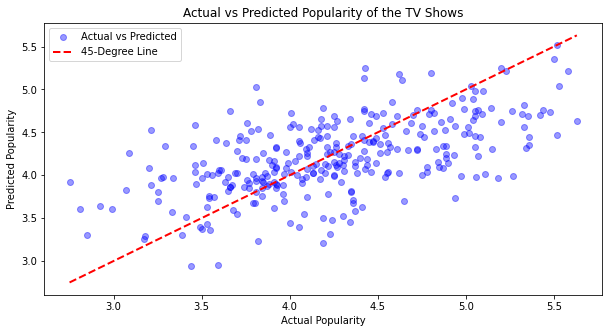

In [168]:
# For Linear Regression
plt.figure(figsize=(10, 5))

plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted', alpha = 0.4)

# The 45-degree red line
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='45-Degree Line')

# Labels
plt.title('Actual vs Predicted Popularity of the TV Shows')
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')

plt.legend()

plt.show()

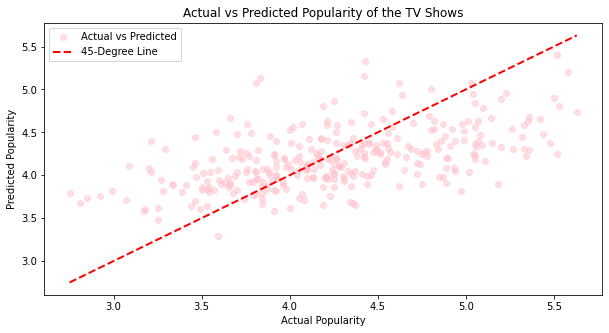

In [167]:
#For Lasso
plt.figure(figsize=(10, 5))

plt.scatter(y_test, y_pred2, color='pink', label='Actual vs Predicted', alpha = 0.5)

# The 45-degree red line
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='45-Degree Line')

# Labels
plt.title('Actual vs Predicted Popularity of the TV Shows')
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')

plt.legend()

plt.show()

Histogram of Distribution of the Residuals:

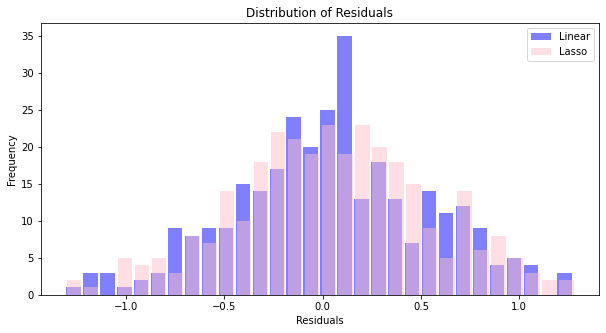

In [130]:
#For Linear Regression
residuals = np.array(y_test) - np.array(y_pred)
residuals2 = np.array(y_test) - np.array(y_pred2)


# Create a histogram of residuals
plt.figure(figsize=(10, 5))

ax1 = plt.hist(residuals, bins=30, color='blue',alpha=0.5, rwidth=0.85, label = 'Linear' )

# Create a histogram of residuals
ax2 = plt.hist(residuals2, bins=30, color='pink',alpha=0.5, rwidth=0.85, label = 'Lasso' )


# Set labels and title
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.legend()
# Show the plot
plt.show()

Linear Regression's residuals are closer to zero than Lasso regression.

## 3.5.3 Random Forest Regression <a id= '3.5.3_Random_Forest_Regression' ><a>

Applying Random Forest Regression. But first, let's find the best parameters:

In [83]:
# Hyperparameters for RandomForestRegresser

param_grid ={'n_estimators': [5, 20, 50, 100], 
             'max_features': ['auto', 'sqrt'], 
             'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120], 
             'min_samples_split': [2, 6, 10], 'min_samples_leaf': [1, 3, 4], 
             'bootstrap': [True, False]} 

In [84]:
random_tree = RandomForestRegressor()
rf_par = RandomizedSearchCV(random_tree, param_grid, cv=10)
rf_par.fit(X_train, y_train)
rf_par.best_params_

{'n_estimators': 50,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 30,
 'bootstrap': True}

In [85]:
# Create an instance of RandomForestRegressor
random = RandomForestRegressor(n_estimators = 50, min_samples_leaf = 10, max_features= 'auto',
                               max_depth= 30, min_samples_split = 6, min_samples_leaf = 4, bootstrap= True)
random_model = random.fit(X_train,y_train)
y_pred3 = random.predict(X_test)
score2 = random.score(X_test,y_test)
print('Score {}'.format(score2))

Score 0.42647965816796995


## 3.5.4 Evaluation Metrics for Random Forest Regression <a id='3.5.4_Evaluation_Metrics_for_Random_Forest_Regression'><a>

Adjusted R-Squared:

In [86]:
#Make predictions

# Calculate the regular R-squared
random_r2 = r2_score(y_test, y_pred3)

# Get the number of observations (n) and predictors (k)
n = X_test.shape[0]
k = X_test.shape[1]

# Calculate the adjusted R-squared
random_adjusted_r2 = 1 - ((1 - random_r2) * (n - 1) / (n - k - 1))

print(f'R-squared: {random_r2}')
print(f'Adjusted R-squared: {random_adjusted_r2}')

R-squared: 0.42647965816796995
Adjusted R-squared: -0.2977467588899949


Mean Absolute Percentage Error:

In [94]:
percent_error = (y_test - y_pred3) / y_test

ab_percent_error = abs(percent_error)

random_mape = np.mean(ab_percent_error)
print ("Random Reg's MAPE % {}".format(round(random_mape *100,2)))


Random Reg's MAPE % 8.54


Actual-vs-Predicted scatter plots:

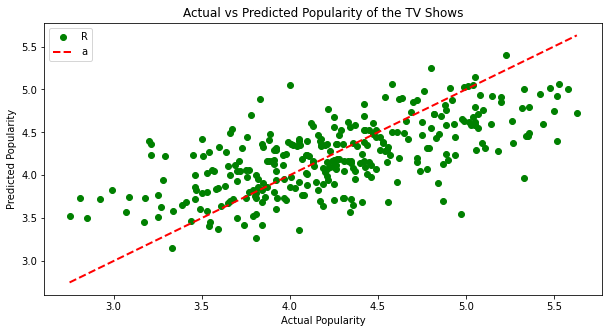

In [133]:
plt.figure(figsize = (10,5))
plt.scatter(y_test, y_pred3, color='green', label='Actual vs Predicted')

# The 45-degree red line
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='45-Degree Line')

# Labels
plt.title('Actual vs Predicted Popularity of the TV Shows')
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')

plt.legend('Random Forest')

plt.show()

Histogram of Distribution of the Residuals:

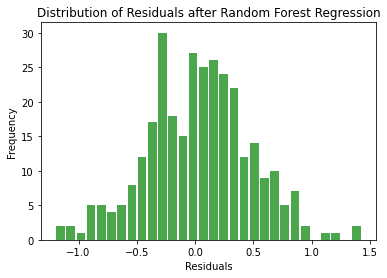

In [89]:
residuals3 = np.array(y_test) - np.array(y_pred3)

# Create a histogram of residuals
plt.hist(residuals3, bins=30, color='green',alpha=0.7, rwidth=0.85 )

# Set labels and title
plt.title('Distribution of Residuals after Random Forest Regression')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

# Show the plot
plt.show()

The Linear and Lasso were less spread than this. Let's put all of them in a single histogram

Random Forest Regressor seems slightly better on the histogram.

## 3.5.5 XGBoost Regression <a id= '3.5.5_XGBoost_Regression' ><a>

In [97]:
model3 = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

grid_search = GridSearchCV(estimator=model3, param_grid=param_grid, cv=10)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None,...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
        

In [98]:
best_params = grid_search.best_params_
print (best_params)

{'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}


In [109]:
xgboost = xgb.XGBRegressor(n_estimators = 100, colsample_bytee= 0.8,
                               max_depth= 3, subsample = 0.8, learning_rate = 0.1)
xgb_model = xgboost.fit(X_train,y_train)
y_pred4 = xgboost.predict(X_test)
score4 = xgboost.score(X_test,y_test)
print('Score {}'.format(score4))

Score 0.5099844873583769


/Users/esrasaydam/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [23:02:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "colsample_bytee" } are not used.

  warnings.warn(smsg, UserWarning)


This is a very good score. Continuing with other evaluation metrics

## 3.5.6 Evaluation Metrics for XGBoost Regression <a id='3.5.6_Evaluation_Metrics_for_XGBoost_Regression'><a>

In [110]:
#Make predictions

# Calculate the regular R-squared
xgb_r2 = r2_score(y_test, y_pred4)

# Get the number of observations (n) and predictors (k)
n = X_test.shape[0]
k = X_test.shape[1]

# Calculate the adjusted R-squared
xgb_adjusted_r2 = 1 - ((1 - xgb_r2) * (n - 1) / (n - k - 1))

print(f'R-squared: {xgb_r2}')
print(f'Adjusted R-squared: {xgb_adjusted_r2}')

R-squared: 0.5099844873583769
Adjusted R-squared: -0.10879422568542463


Mean Absolute Percentage Error:

In [111]:
xgb_mape = mean_absolute_percentage_error(y_test, y_pred4)
print ("XGBoost Reg's MAPE % {}".format(round(xgb_mape *100,2)))


XGBoost Reg's MAPE % 7.78


Actual-vs-Predicted scatter plots:

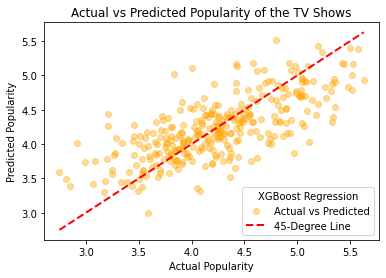

In [165]:
plt.scatter(y_test, y_pred4, color='orange', label='Actual vs Predicted', alpha = 0.4)

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='45-Degree Line')

# Labels
plt.title('Actual vs Predicted Popularity of the TV Shows')
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')

plt.legend(title='XGBoost Regression')

plt.show()

This might be overfitting but the results are very accurate. 

In [113]:
xgb_train_score =xgboost.score(X_train,y_train)
xgb_test_score =xgboost.score(X_test,y_test)

print("The train score {}".format(xgb_train_score))
print("The test score  {}".format(xgb_test_score))


The train score 0.7237010240406015
The test score  0.5099844873583769


Okay, the train score leads the test score with a big difference.

Histogram of Distribution of the Residuals:

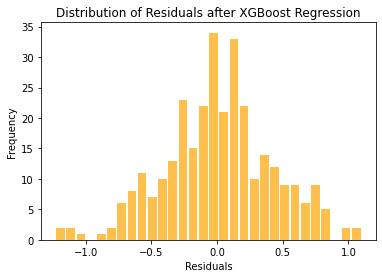

In [114]:
residuals4 = np.array(y_test) - np.array(y_pred4)

# Create a histogram of residuals
plt.hist(residuals4, bins=30, color='orange',alpha=0.7, rwidth=0.85 )

# Set labels and title
plt.title('Distribution of Residuals after XGBoost Regression')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

# Show the plot
plt.show()

The values are closer to zero.

## 3.6 General Comparison of the Models <a id='3.6_General_Comparison_of_the_Models'><a>

Now let's compare all plots together
First with scatterplots (with 4 separate plots):

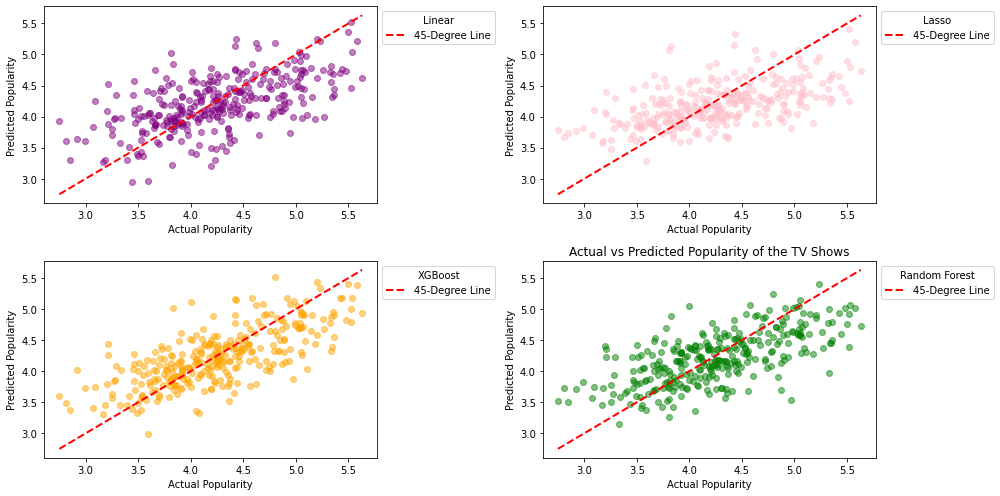

In [157]:
# Comparing Actual vs Predicted plots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 7))

# For Linear Regression


axes[0, 0].scatter(y_test, y_test_pred, color='purple', alpha = 0.5)

# The 45-degree red line

axes[0, 0].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='45-Degree Line')

#Labels
axes[0, 0].set_xlabel('Actual Popularity')
axes[0, 0].set_ylabel('Predicted Popularity')
axes[0, 0].legend(loc='upper left', bbox_to_anchor=(1, 1), title = 'Linear')

#For Lasso
plt.title('Actual vs Predicted Popularity of the TV Shows')

axes[0, 1].scatter(y_test, y_pred2, color='pink', alpha = 0.5)

# The 45-degree red line
axes[0, 1].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='45-Degree Line')

# Labels
axes[0, 1].set_xlabel('Actual Popularity')
axes[0, 1].set_ylabel('Predicted Popularity')
axes[0, 1].legend(loc='upper left', bbox_to_anchor=(1, 1), title = 'Lasso')

#For XGBoost
axes[1, 0].scatter(y_test, y_pred4, color='orange', alpha = 0.5)

axes[1, 0].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='45-Degree Line')

# Labels
axes[1, 0].set_xlabel('Actual Popularity')
axes[1, 0].set_ylabel('Predicted Popularity')
axes[1, 0].legend(loc='upper left', bbox_to_anchor=(1, 1), title = 'XGBoost')


# For Random Forest
axes[1, 1].scatter(y_test, y_pred3, color='green', alpha = 0.5)

# The 45-degree red line
axes[1, 1].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='45-Degree Line')

# Labels
axes[1, 1].set_xlabel('Actual Popularity')
axes[1, 1].set_ylabel('Predicted Popularity')


axes[1, 1].legend(loc='upper left', bbox_to_anchor=(1, 1), title = 'Random Forest')

plt.tight_layout()

plt.show()

And then together:

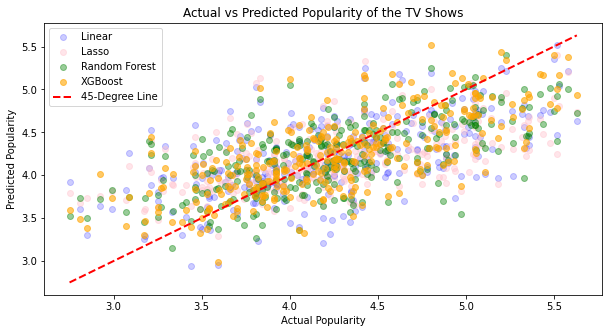

In [126]:
plt.figure(figsize=(10, 5))
ax1 =  plt.scatter(y_test, y_pred, color='blue', alpha = 0.2, label='Linear')
ax2 = plt.scatter(y_test, y_pred2, color='pink', alpha = 0.4, label='Lasso')
ax3 = plt.scatter(y_test, y_pred3, color='green', alpha = 0.4, label='Random Forest')
#making xgboost slightly more visible since it seems to perform the best
ax4 = plt.scatter(y_test, y_pred4, color='orange', alpha = 0.6, label='XGBoost')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='45-Degree Line')

# Labels
plt.title('Actual vs Predicted Popularity of the TV Shows')
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')

plt.legend()

plt.show()

Histogram of Distribution of Residuals:
(First on separate plots)

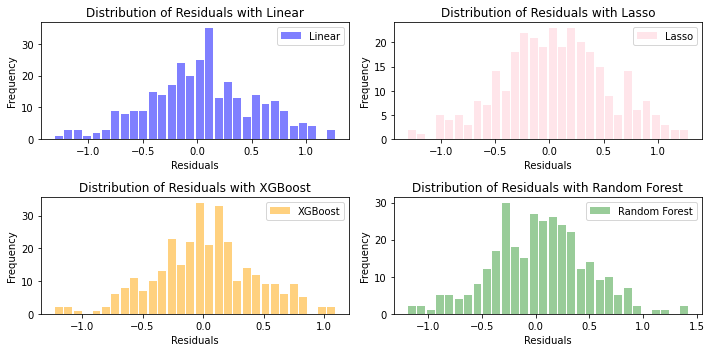

In [163]:
#For Linear, Lasso, Random and XGBoost
residuals = np.array(y_test) - np.array(y_pred)
residuals2 = np.array(y_test) - np.array(y_pred2)
residuals3 = np.array(y_test) - np.array(y_pred3)
residuals4 = np.array(y_test) - np.array(y_pred4)


fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 5))

#Linear
_= axes[0,0].hist(residuals, bins=30, color='blue',alpha=0.5, rwidth=0.85, label = 'Linear' )
# Set labels and title
axes[0,0].set_title('Distribution of Residuals with Linear')
axes[0,0].set_xlabel('Residuals')
axes[0,0].set_ylabel('Frequency')
axes[0,0].legend()
#Lasso
_= axes[0,1].hist(residuals2, bins=30, color= 'pink', alpha=0.4, rwidth=0.85, label = 'Lasso')
# Set labels and title
axes[0,1].set_title('Distribution of Residuals with Lasso')
axes[0,1].set_xlabel('Residuals')
axes[0,1].set_ylabel('Frequency')
axes[0,1].legend()

# XGBoost
_=axes[1,0].hist(residuals4, bins=30, color='orange',alpha=0.5, rwidth=0.85, label = 'XGBoost' )
# Set labels and title
axes[1,0].set_title('Distribution of Residuals with XGBoost')
axes[1,0].set_xlabel('Residuals')
axes[1,0].set_ylabel('Frequency')
axes[1,0].legend()


#Random Forest
_ = axes[1,1].hist(residuals3, bins=30, color='green',alpha=0.4, rwidth=0.85, label = 'Random Forest' )

# Set labels and title
axes[1,1].set_title('Distribution of Residuals with Random Forest')
axes[1,1].set_xlabel('Residuals')
axes[1,1].set_ylabel('Frequency')
axes[1,1].legend()

plt.tight_layout()
# Show the plot
plt.show()

In [164]:
And now together:

SyntaxError: invalid syntax (125956839.py, line 1)

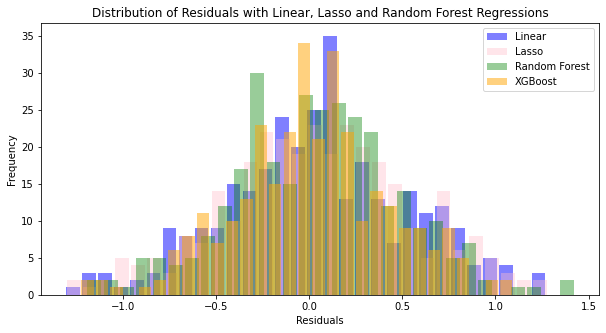

In [125]:

# Create a histogram of residuals
plt.figure(figsize=(10, 5))

ax1 = plt.hist(residuals, bins=30, color='blue',alpha=0.5, rwidth=0.85, label = 'Linear' )

ax2 = plt.hist(residuals2, bins=30, color= 'pink', alpha=0.4, rwidth=0.85, label = 'Lasso')

ax3 = plt.hist(residuals3, bins=30, color='green',alpha=0.4, rwidth=0.85, label = 'Random Forest' )

ax4 = plt.hist(residuals4, bins=30, color='orange',alpha=0.5, rwidth=0.85, label = 'XGBoost' )


# Set labels and title
plt.title('Distribution of Residuals with Linear, Lasso and Random Forest Regressions')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.legend()
# Show the plot
plt.show()

Clearly, XGBoost is performing much better than others.

Finally creating a table of results

In [115]:
# import table module
from tabulate import tabulate
 
mydata = [
    ["Linear Regression", linear_r2,linear_adjusted_r2 , round(linear_mape * 100,2)], 
    ["Lasso Regression", lasso_r2, lasso_adjusted_r2, round(lasso_mape * 100,2)], 
    ["Random Forest Regrssion", random_r2, random_adjusted_r2, round(random_mape * 100,2)], 
      ["XGBoost", xgb_r2, xgb_adjusted_r2, round(xgb_mape * 100,2)]
]
 
# create header
head = ["Model", "r2", "A-r2", "MAPE"]
 
print(tabulate(mydata, headers=head, tablefmt="grid"))

+-------------------------+----------+-----------+--------+
| Model                   |       r2 |      A-r2 |   MAPE |
+=========================+==========+===========+========+
| Linear Regression       | 0.309391 | -0.562692 |   9.28 |
+-------------------------+----------+-----------+--------+
| Lasso Regression        | 0.29744  | -0.589734 |   9.44 |
+-------------------------+----------+-----------+--------+
| Random Forest Regrssion | 0.42648  | -0.297747 |   8.54 |
+-------------------------+----------+-----------+--------+
| XGBoost                 | 0.509984 | -0.108794 |   7.78 |
+-------------------------+----------+-----------+--------+


XGBoost is the winner.

## 3.7 Saving the Models <a id= '3.7_Saving_the_Models'><a>

In [116]:
import joblib 

# save model with joblib 
# Linear Model
linear_filename = 'linear_model.sav'
joblib.dump(linear_model, linear_filename)

#Lasso Model
lasso_filename = 'lasso_model.sav'
joblib.dump(lasso_model, lasso_filename)

#RF Model
random_filename = 'random_model.sav'
joblib.dump(random_model, lasso_filename)

# XGBoost Model
xgb_filename ='xgb_model.sav'
joblib.dump(xgb_model, xgb_filename)

my_X_train = 'X_train.sav'
joblib.dump(X_train, my_X_train)

my_y_train = 'y_train.sav'
joblib.dump(y_train, my_y_train)

my_X_test = 'X_test.sav'
joblib.dump(X_test, my_X_test)

my_y_train = 'y_test.sav'
joblib.dump(y_test, my_y_train)


['y_test.sav']

## 3.8 Preprocessing Conclusion <a id= '3.8_Preprocessing_Conclusion'><a>

In this process we explored baseline modeling trying the universal models, Linear, Lasso, Random Forest Regression, and XGBoost Regression. The reason why we tried multiple models to search for the best performances. 

Also we decided to exclude many features (such as director, writer, or actor names along with their id numbers on movie websites) to have a more efficient process. We also used dummies to use certain categorical features such as genre, original language etc.We saved all the models with joblib.

All MAPEs for 4 models were under 10 percent, which is a promising situation for us. The MAPE of XGBoost is around 7 percent and Random Forest is at 8.5 percent. 
 

Now moving on building our customi